# Wine quality

Ce jeu de donnée permet de déterminer la qualité de 1599 vins donnée par une valeur numérique entre 3 et 8 grâce à des mesures de différents paramètres. On peut donc faire  créer un modèle de régression qui permet de détermnier la qualité d'un vin à partir de ses paramètres mesurés.

## Chargement des données

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from outils.frontiere import *
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [15]:
# récupération de données discrètes
import pandas as pd
filename = "C:/Users/Administrateur/Downloads/TP_sklearn/wine/winequality-red.csv"
data = pd.read_csv(filename)

X = data.values[:,:-1]
Y = data.values[:,-1] 

In [16]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [17]:
# remise en forme des Y entre 0 et nClasses
val = np.unique(Y)
transf = dict(zip(val,np.arange(len(val)))) # mapping [x,y,z] => [0,1,2]
y = np.vectorize(transf.get)(Y) 

In [18]:
# recherche à savoir si y a des données manquantes
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Comparaison des modèles
### Sans sélection des variables, sans normalisation, sans discretisation

In [20]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [21]:
!pip install xgboost

In [22]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import svm,linear_model, naive_bayes
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict


In [24]:
# cv sur train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_train,y_train)
    yhat = cross_val_predict(mod, X_train, y_train)
    acc_cv = cross_val_score(mod, X_train, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())
    print(classification_report(y_train, yhat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RegLog 0.5574353401434471
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.63      0.75      0.69       452
           3       0.48      0.60      0.54       413
           4       0.43      0.07      0.11       151
           5       0.00      0.00      0.00        13

    accuracy                           0.56      1071
   macro avg       0.26      0.24      0.22      1071
weighted avg       0.52      0.56      0.51      1071

SVM 0.4920625950880243
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.64      0.44      0.52       452
           3       0.43      0.80      0.56       413
           4       0.00      0.00      0.00       151
           5       0.00      0.00      0.00        13

    accuracy                

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest 0.6629776135622691
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.72      0.78      0.75       452
           3       0.60      0.68      0.64       413
           4       0.63      0.44      0.52       151
           5       1.00      0.15      0.27        13

    accuracy                           0.66      1071
   macro avg       0.49      0.34      0.36      1071
weighted avg       0.64      0.66      0.64      1071

XGboost 0.6489502282112584
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.20      0.06      0.09        36
           2       0.71      0.77      0.74       452
           3       0.61      0.64      0.63       413
           4       0.61      0.52      0.56       151
           5       0.33      0.15      0.21        13

    accuracy      

### Discrétiser les variables avec bcp de valeurs uniques

In [19]:
# recherche si les variables sont dicretes ou non
print(Y.shape)
print(X[:,0].shape)
n = data.nunique(axis=0)
  
print("number of unique values in each column :\n", n)

(1599,)
(1599,)
number of unique values in each column :
 fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


On discrétse seulement la colomne 7

In [99]:
from sklearn.preprocessing import KBinsDiscretizer
dis = KBinsDiscretizer(encode='ordinal', strategy='uniform')
dis.fit(X_train[:,7:8])
X_train_dis = dis.transform(X_train[:,7:8])

In [100]:
X_new = np.hstack((X_train[:,(0,1,2,3,4,5,6,8,9,10)], X_train_dis))

In [102]:
print(X_train_dis)
print(X_train[1:,7])
print(X_train.shape)
print(X_new.shape)

[[3.]
 [1.]
 [4.]
 ...
 [2.]
 [4.]
 [2.]]
[0.9949  1.0014  0.9983  ... 0.99677 1.0021  0.998  ]
(1071, 11)
(1071, 11)


In [103]:
# cv sur train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_new,y_train)
    yhat = cross_val_predict(mod, X_new, y_train)
    acc_cv = cross_val_score(mod, X_new, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())
    print(classification_report(y_train, yhat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RegLog 0.5480982395131493
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.63      0.71      0.67       452
           3       0.48      0.57      0.52       413
           4       0.46      0.21      0.28       151
           5       0.00      0.00      0.00        13

    accuracy                           0.55      1071
   macro avg       0.26      0.25      0.24      1071
weighted avg       0.51      0.55      0.52      1071

SVM 0.491128015648772
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.64      0.44      0.52       452
           3       0.43      0.79      0.56       413
           4       0.00      0.00      0.00       151
           5       0.00      0.00      0.00        13

    accuracy                 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest 0.6639426211693109
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.71      0.77      0.74       452
           3       0.61      0.68      0.65       413
           4       0.68      0.53      0.59       151
           5       0.67      0.15      0.25        13

    accuracy                           0.66      1071
   macro avg       0.45      0.36      0.37      1071
weighted avg       0.64      0.66      0.65      1071

XGboost 0.648958921973484
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.18      0.06      0.09        36
           2       0.71      0.77      0.74       452
           3       0.60      0.63      0.62       413
           4       0.63      0.56      0.59       151
           5       0.29      0.15      0.20        13

    accuracy       

Pas d'amélioration des performances en validation croisée

### Normalisation des variables car échelles de mesures très différentes

In [104]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [108]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X_new = scal.fit_transform(X_train)
print(X_new.shape)

(1071, 11)


In [109]:
# cv sur train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_new,y_train)
    yhat = cross_val_predict(mod, X_new, y_train)
    acc_cv = cross_val_score(mod, X_new, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())
    print(classification_report(y_train, yhat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RegLog 0.5770571614866332
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.65      0.73      0.69       452
           3       0.51      0.55      0.53       413
           4       0.53      0.41      0.46       151
           5       0.00      0.00      0.00        13

    accuracy                           0.58      1071
   macro avg       0.28      0.28      0.28      1071
weighted avg       0.55      0.58      0.56      1071

SVM 0.5985394479460987
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.67      0.75      0.71       452
           3       0.53      0.61      0.57       413
           4       0.55      0.34      0.42       151
           5       0.00      0.00      0.00        13

    accuracy                

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest 0.6639339274070855
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.71      0.78      0.74       452
           3       0.61      0.66      0.63       413
           4       0.67      0.55      0.61       151
           5       0.67      0.15      0.25        13

    accuracy                           0.66      1071
   macro avg       0.44      0.36      0.37      1071
weighted avg       0.64      0.66      0.65      1071

XGboost 0.6508193870897632
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.20      0.06      0.09        36
           2       0.71      0.77      0.74       452
           3       0.61      0.65      0.63       413
           4       0.61      0.52      0.56       151
           5       0.33      0.15      0.21        13

    accuracy      

Meilleur performances que sans normalisation

## Avec sélection des variables

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

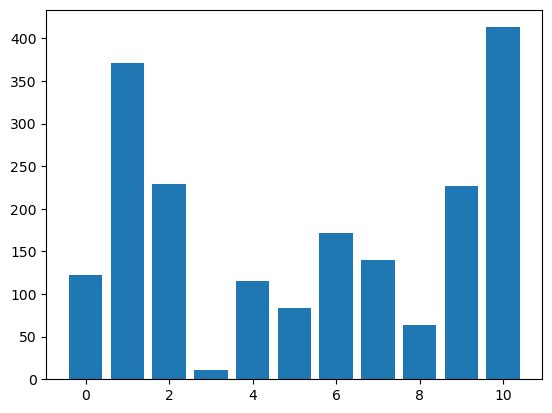

In [110]:
# Corrélation des variables par rapport à y
corr = np.abs(X_new.T @ y_train)
plt.figure()
plt.bar(np.arange(len(corr)), corr)

data.corr()["quality"].sort_values()

### Sélection itérative avec sklearn
faire varier n_feature_to_select

In [111]:
# Avec sklearn
from sklearn.feature_selection import SequentialFeatureSelector
mod = svm.SVC()
selector = SequentialFeatureSelector(mod, n_features_to_select=6)
selector = selector.fit(X_new, y_train)
Xnew = selector.transform(X_new)

In [112]:
print('Xtrain:', X_train.shape)
print('Xnew:', Xnew.shape)

Xtrain: (1071, 11)
Xnew: (1071, 6)


In [113]:
# cv
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_new,y_train)
    yhat = cross_val_predict(mod, X_new, y_train)
    acc_cv = cross_val_score(mod, X_new, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())
    print(classification_report(y_train, yhat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RegLog 0.5770571614866332
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.65      0.73      0.69       452
           3       0.51      0.55      0.53       413
           4       0.53      0.41      0.46       151
           5       0.00      0.00      0.00        13

    accuracy                           0.58      1071
   macro avg       0.28      0.28      0.28      1071
weighted avg       0.55      0.58      0.56      1071

SVM 0.5985394479460987
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.67      0.75      0.71       452
           3       0.53      0.61      0.57       413
           4       0.55      0.34      0.42       151
           5       0.00      0.00      0.00        13

    accuracy                

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest 0.662977613562269
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      0.03      0.05        36
           2       0.71      0.78      0.74       452
           3       0.61      0.68      0.64       413
           4       0.66      0.51      0.58       151
           5       1.00      0.15      0.27        13

    accuracy                           0.66      1071
   macro avg       0.55      0.36      0.38      1071
weighted avg       0.65      0.66      0.65      1071

XGboost 0.6508193870897632
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.20      0.06      0.09        36
           2       0.71      0.77      0.74       452
           3       0.61      0.65      0.63       413
           4       0.61      0.52      0.56       151
           5       0.33      0.15      0.21        13

    accuracy       

Les performances ne sont pas meilleur avec cette sélection de variables sauf pour le SVM par rapport à sans sélection 
de variables. Cette méthodes prends du temps comparée aux méthodes suivantes.

### Sélection avec ACP 
faire varier n_components

In [114]:
# Avec ACP
from sklearn.decomposition import PCA
# application de la PCA
pca = PCA(n_components=6)
pca.fit(X_new)

# projection
Xnew = pca.transform(X_new)

In [115]:
print(Xnew.shape)
print(X_train.shape)

(1071, 6)
(1071, 11)


In [116]:
# cv
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_new,y_train)
    yhat = cross_val_predict(mod, X_new, y_train)
    acc_cv = cross_val_score(mod, X_new, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RegLog 0.5770571614866332
SVM 0.5985394479460987
RandomForest 0.6508454683764399
XGboost 0.6508193870897632


### Sélection au cours de l'apprentissage avec la régularisation de Ridge

[1.e+10 1.e+08 1.e+06 1.e+04 1.e+02 1.e+00 1.e-02 1.e-04 1.e-06 1.e-08
 1.e-10]


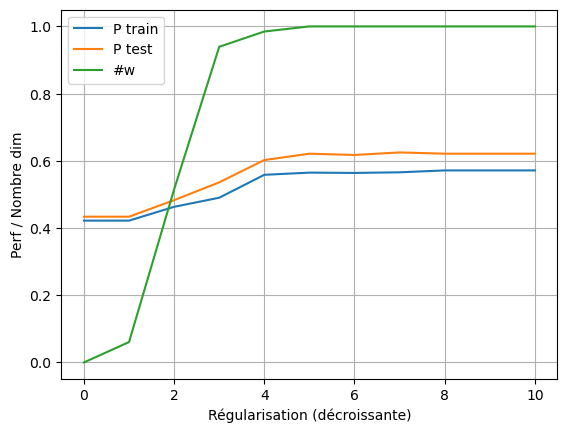

In [120]:
# Au cours de l'apprentissage avec la régularisation de Ridge
from sklearn.linear_model import RidgeClassifier

all_a = 10**(np.linspace(10,-10,11))# différentes valeurs de C sur les données d'origine
print(all_a)
p_a = [] # perf en apprentissage
p_t = [] # perf en test
wc = []  # cardinal des coefficients non nul


for a in all_a:
    mod = RidgeClassifier(alpha=a)
    mod.fit(X_train,y_train)
    yhata = mod.predict(X_train)
    yhatt = mod.predict(X_test)
    p_a.append(accuracy_score(yhata, y_train))
    p_t.append(accuracy_score(yhatt, y_test))
    wc.append(np.where(np.abs(mod.coef_)>1e-5, 1, 0).mean())  
    
plt.figure()
plt.plot(p_a)
plt.plot(p_t)
plt.plot(wc)
plt.grid()
plt.xlabel('Régularisation (décroissante)')
plt.ylabel('Perf / Nombre dim')
plt.legend(['P train', 'P test', '#w'])

## Optimisation des paramètres de chaque modèles

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

#liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
#liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']

#for i in range(len(liste_mod)):
mod = svm.SVC()
# dictionnaire: key = nom du paramètre dans le classifieur
param = {'gamma' : [0.01, 0.05, 0.1, 0.5, 1, 5 ], 'C': [0.1,1,5,10,100]}
meta_mod = GridSearchCV(estimator=mod, param_grid=param)
meta_mod.fit(X_train,y_train) # la validation croisée va être effectuée sur les données de train
print("Best parameter (CV score=%0.3f):" % meta_mod.best_score_)
print(meta_mod.best_params_)


Best parameter (CV score=0.563):
{'C': 10, 'gamma': 0.5}
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
